In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
inputPath = "/content/drive/MyDrive/Projects/Deeplearning1"
inputPathtrain = '/content/drive/MyDrive/Projects/Deeplearning1/Train'

In [4]:
import cv2

In [5]:
example = cv2.imread(inputPath + "/Train/1.jpg")
example

array([[[100, 126, 156],
        [110, 137, 164],
        [127, 154, 181],
        ...,
        [ 54,  42,  62],
        [ 49,  38,  58],
        [ 43,  32,  52]],

       [[114, 140, 170],
        [120, 147, 174],
        [120, 147, 173],
        ...,
        [ 48,  37,  57],
        [ 44,  33,  53],
        [ 40,  31,  51]],

       [[118, 147, 174],
        [128, 157, 184],
        [117, 148, 171],
        ...,
        [ 41,  32,  53],
        [ 38,  29,  50],
        [ 38,  31,  52]],

       ...,

       [[199, 192, 195],
        [203, 197, 202],
        [199, 199, 205],
        ...,
        [196, 163, 144],
        [131,  86,  65],
        [101,  53,  29]],

       [[199, 194, 196],
        [200, 197, 199],
        [197, 200, 204],
        ...,
        [181, 145, 127],
        [124,  81,  64],
        [136,  93,  74]],

       [[201, 196, 198],
        [197, 196, 198],
        [194, 197, 201],
        ...,
        [159, 123, 105],
        [127,  86,  71],
        [181, 138, 123]]

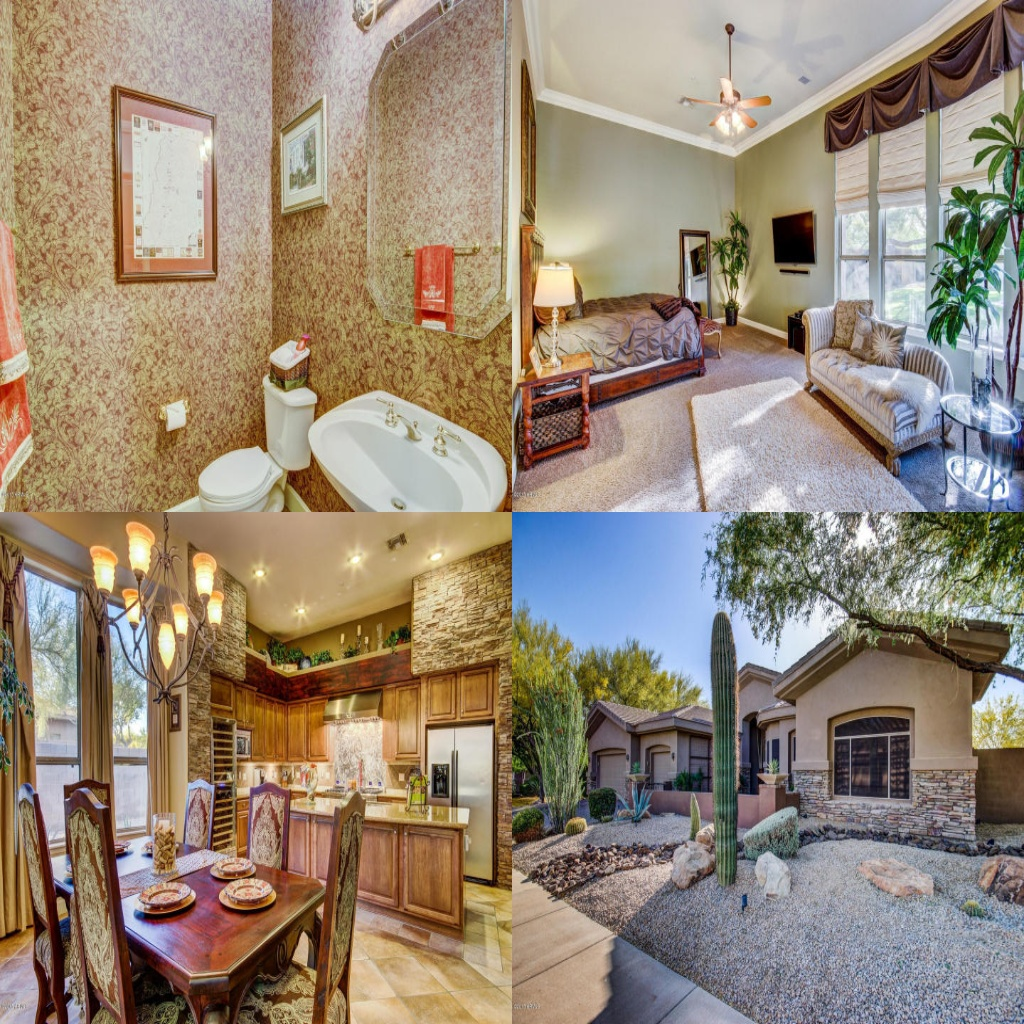

In [6]:
from google.colab.patches import cv2_imshow
cv2_imshow(example)

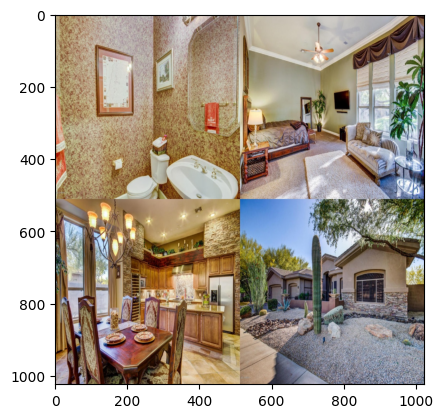

In [7]:
import matplotlib.pyplot as plt
plt.imshow(example[...,::-1])

In [8]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split


train_df = pd.read_csv(os.path.join(inputPath, "train.csv"))
test_df = pd.read_csv(os.path.join(inputPath, "test.csv"))


print(train_df.head())
print(test_df.head())


   House ID  Bedrooms  Bathrooms  Area  Latitude  Longitude   Price
0         1         4        4.0  4053   33.6968  -111.8892  869500
1         2         4        3.0  3343   34.8280  -119.0349  865200
2         3         3        4.0  3923   33.7669  -111.9182  889000
3         4         5        5.0  4022   33.7752  -111.7791  910000
4         5         3        4.0  4116   33.7669  -111.9182  971226
   House ID  Bedrooms  Bathrooms  Area  Latitude  Longitude
0       501         3        2.0  2330   35.6406  -120.7003
1       502         3        2.5  1339   35.6406  -120.7003
2       503         3        2.0  1472   35.6406  -120.7003
3       504         4        4.0  2681   35.6406  -120.7003
4       505         3        2.5  1935   33.8085  -117.9228


In [9]:
num_train_images = len(os.listdir(os.path.join(inputPath, "Train")))
num_test_images = len(os.listdir(os.path.join(inputPath, "Test")))

train_filenames = [str(i) + ".jpg" for i in range(1, num_train_images + 1)]
test_filenames = [str(i) + ".jpg" for i in range(1, num_test_images + 1)]

train_labels = train_df["House ID"]
test_labels = test_df["House ID"]

train_files = [os.path.join(inputPath, "Train", filename) for filename in train_filenames]
test_files = [os.path.join(inputPath, "Test", filename) for filename in test_filenames]


print(train_files)
print(test_files)

['/content/drive/MyDrive/Projects/Deeplearning1/Train/1.jpg', '/content/drive/MyDrive/Projects/Deeplearning1/Train/2.jpg', '/content/drive/MyDrive/Projects/Deeplearning1/Train/3.jpg', '/content/drive/MyDrive/Projects/Deeplearning1/Train/4.jpg', '/content/drive/MyDrive/Projects/Deeplearning1/Train/5.jpg', '/content/drive/MyDrive/Projects/Deeplearning1/Train/6.jpg', '/content/drive/MyDrive/Projects/Deeplearning1/Train/7.jpg', '/content/drive/MyDrive/Projects/Deeplearning1/Train/8.jpg', '/content/drive/MyDrive/Projects/Deeplearning1/Train/9.jpg', '/content/drive/MyDrive/Projects/Deeplearning1/Train/10.jpg', '/content/drive/MyDrive/Projects/Deeplearning1/Train/11.jpg', '/content/drive/MyDrive/Projects/Deeplearning1/Train/12.jpg', '/content/drive/MyDrive/Projects/Deeplearning1/Train/13.jpg', '/content/drive/MyDrive/Projects/Deeplearning1/Train/14.jpg', '/content/drive/MyDrive/Projects/Deeplearning1/Train/15.jpg', '/content/drive/MyDrive/Projects/Deeplearning1/Train/16.jpg', '/content/drive/

In [10]:

import numpy as np
from sklearn.model_selection import train_test_split

import os
import cv2

def read_images_from_directory(directory_path, num_images):
    images = []
    labels = []
    for i in range(1, num_images + 1):
        image_path = os.path.join(directory_path, f"{i}.jpg")
        if os.path.exists(image_path):
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            if image is not None:
                images.append(image)
                label = int(os.path.splitext(os.path.basename(image_path))[0])
                labels.append(label)
    return images, labels


train_directory = os.path.join(inputPath, "Train")
num_images = 500
train_images, train_labels = read_images_from_directory(train_directory, num_images)

x_train, x_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

x_train = x_train / 255.0
x_test = x_test / 255.0

input_shape = x_train[0].shape

x_train = x_train.reshape(x_train.shape[0], input_shape[0], input_shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], input_shape[0], input_shape[1], 1)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



x_train shape: (400, 1024, 1024, 1)
x_test shape: (100, 1024, 1024, 1)
y_train shape: (400,)
y_test shape: (100,)


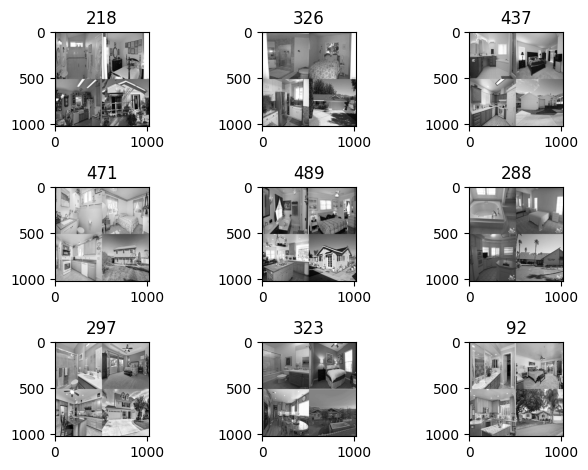

In [11]:
indices = np.random.choice(len(x_train), size=9, replace=False)

for count, value in enumerate(indices):
    plt.subplot(3, 3, count+1)
    plt.imshow(x_train[value], cmap="gray")
    plt.title(y_train[value])

plt.tight_layout()
plt.show()


Number of images in the dataset: 500
Average image size: [1024. 1024.]
Average number of color channels: 1.0


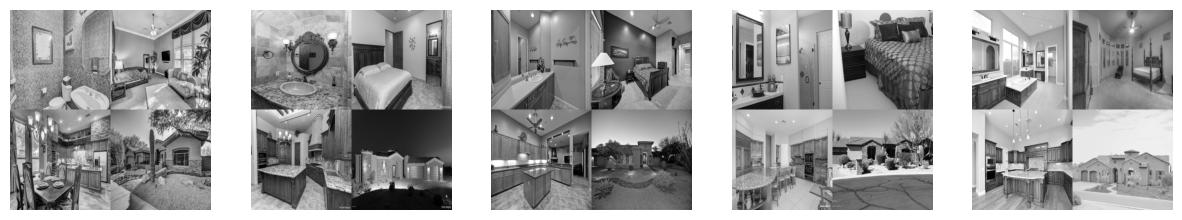

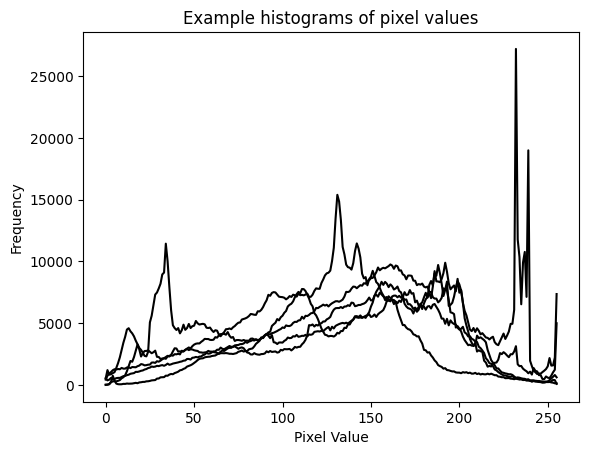

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def display_images(images, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    for i in range(num_samples):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].axis('off')
    plt.show()

def display_histograms(images, num_samples=5):
    for i, image in enumerate(images[:num_samples]):
        histogram = cv2.calcHist([image], [0], None, [256], [0, 256])
        plt.plot(histogram, color='black')
    plt.title('Example histograms of pixel values')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()

num_images = len(train_images)
print("Number of images in the dataset:", num_images)

image_sizes = np.array([image.shape[:2] for image in train_images])
print("Average image size:", np.mean(image_sizes, axis=0))

num_channels = np.array([image.shape[2] if len(image.shape) == 3 else 1 for image in train_images])
print("Average number of color channels:", np.mean(num_channels))

display_images(train_images)
display_histograms(train_images)



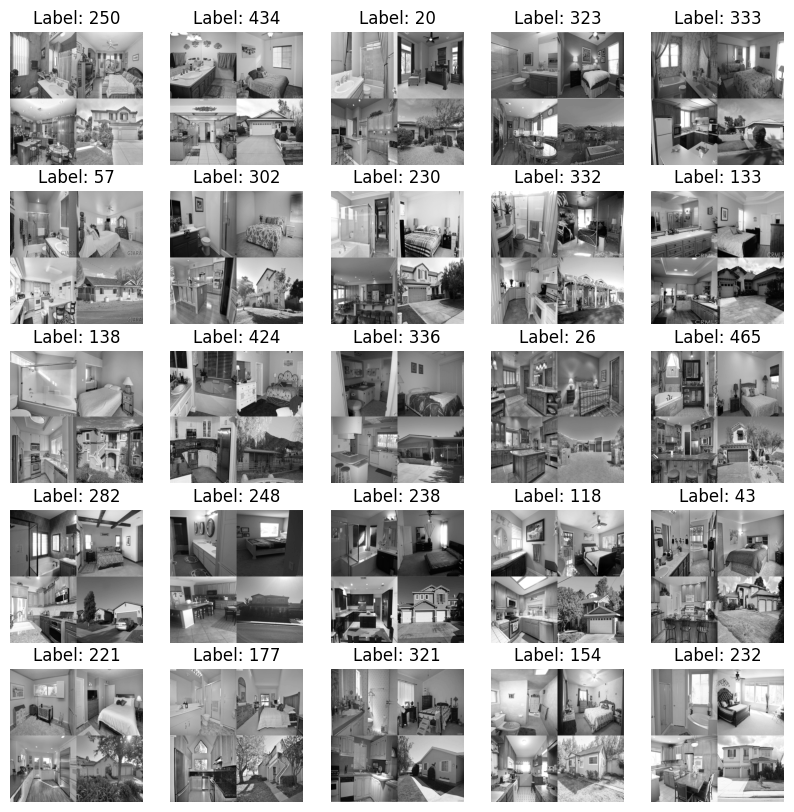

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()


In [16]:
import numpy as np

print(np.any(np.isnan(x_train)))
print(np.any(np.isnan(y_train)))

False
False


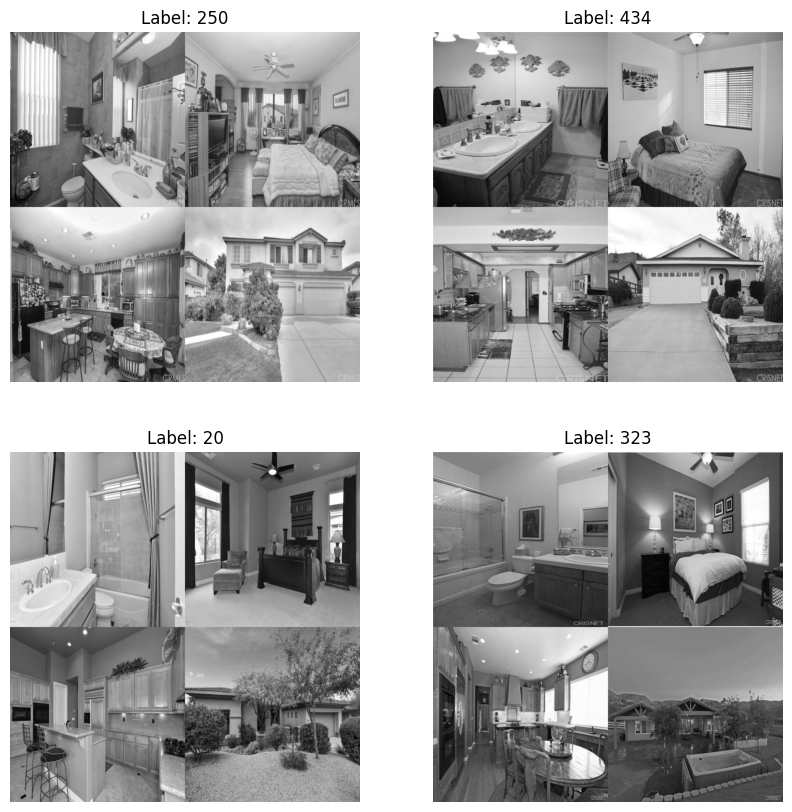

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1048576)           0         
                                                                 
 dense (Dense)               (None, 128)               134217856 
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 134219146 (512.01 MB)
Trainable params: 134219146 (512.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
45/45 [==============================] - 6s 61ms/step - loss: nan - sparse_categorical_accuracy: 0.0000e+00 - val_loss: nan - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 2/10
45/45 [==============================] - 2s 51ms/step - loss: nan - sparse_categor

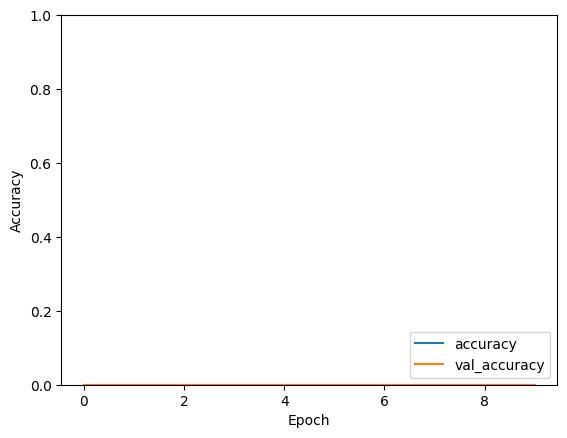

4/4 - 0s - loss: nan - sparse_categorical_accuracy: 0.0000e+00 - 480ms/epoch - 120ms/step
Test accuracy: 0.0


In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

model = Sequential([
      layers.Flatten(input_shape=(1024, 1024)),
      layers.Dense(128, activation='relu'),
      layers.Dense(10, activation='softmax')])

model.summary()


model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

history = model.fit(x_train, y_train, validation_split=0.1, epochs=10, batch_size=8, verbose=1)

plt.plot(history.history['sparse_categorical_accuracy'], label='accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_accuracy)
